### Integer Linear Program Example

In [1]:
# Solve the following MIP:
#  maximize
#        x +   y + 2 z
#  subject to
#        x + 2 y + 3 z <= 4
#        x +   y       >= 1
#        x, y, z binary

import gurobipy as gp

# Create a new model
m = gp.Model()

# Create variables
x = m.addVar(vtype='B', name="x")
y = m.addVar(vtype='B', name="y")
z = m.addVar(vtype='B', name="z")

# Set objective function
m.setObjective(x + y + 2 * z, gp.GRB.MAXIMIZE)

# Add constraints
m.addConstr(x + 2 * y + 3 * z <= 4)
m.addConstr(x + y >= 1)

# Solve it!
m.optimize()

print(f"Optimal objective value: {m.objVal}")
print(f"Solution values: x={x.X}, y={y.X}, z={z.X}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-19
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 3 3250U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x98886187
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, 

### ---------------------------------------------------------------------------------------------------------------------------------

### ILP for Shortest Path (Does'nt work for negative cycles)

In [18]:
import gurobipy as gp
from gurobipy import GRB

# Define the graph
nodes = ['s', 'a', 'b', 'c', 't']
edges = {
    ('s', 'a'): 1,
    ('s', 'b'): 4,
    ('a', 'b'): 2,
    ('a', 'c'): 5,
    ('b', 'c'): 1,
    ('b', 't'): 3,
    ('c', 't'): 2
}

# Create a new model
m = gp.Model()

# Create variables
x = {}
for u, v in edges:
    x[u, v] = m.addVar(vtype=GRB.BINARY, name=f"x_{u}_{v}")

# Set objective function
m.setObjective(gp.quicksum(x[u, v] * edges[u, v] for u, v in edges), GRB.MINIMIZE)

# Add constraints

# Constraint 1: The number of edges leaving 's' is 1
m.addConstr(gp.quicksum(x['s', v] for v in nodes if ('s', v) in edges) == 1, "c1")

# Constraint 2: The number of edges entering 't' is 1
m.addConstr(gp.quicksum(x[u, 't'] for u in nodes if (u, 't') in edges) == 1, "c2")

# Constraint 3: For all other vertices, the number of edges leaving them equals the number of edges entering them
for p in nodes:
    if p not in ['s', 't']:
        m.addConstr(
            gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) -
            gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) == 0,
            f"flow_{p}"
        )

# Constraint 4: For every edge uv, 0 ≤ xuv ≤ 1, xuv integral
# This is implicitly handled by the binary variable type in Gurobi

# Solve the model
m.optimize()

# Print the optimal objective value and solution values
if m.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {m.objVal}")
    for u, v in edges:
        print(f"x_{u}_{v} = {x[u, v].X}")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 3 3250U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 7 columns and 14 nonzeros
Model fingerprint: 0x7f4b9345
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.000000000000e+00, best bound 6.000000000000e+00, gap 0.0000%
Optimal objective value: 6.0
x_s_a = 1.0
x_s_b = 0.0
x_a_b = 1.0
x_a_c = 0.0
x_b_c = 0.0
x_b_t 

### ----------------------------------------------------------------------------------------------------------------------------------------

### Same Program but with visual representation

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 3 3250U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 7 columns and 14 nonzeros
Model fingerprint: 0x7f4b9345
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.000000000000e+00, best bound 6.000000000000e+00, gap 0.0000%


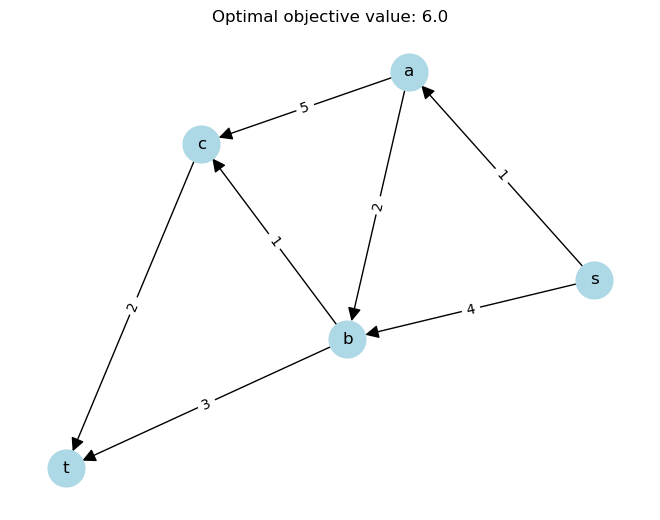

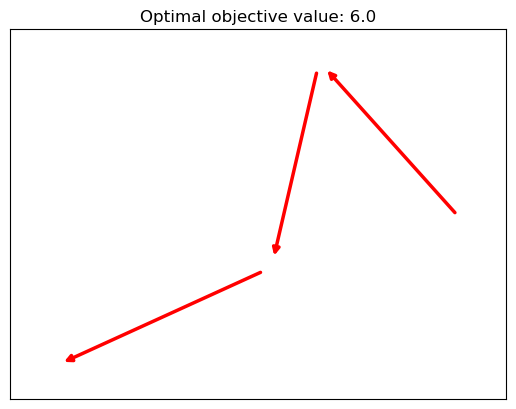

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

# Define the graph
nodes = ['s', 'a', 'b', 'c', 't']
edges = {
    ('s', 'a'): 1,
    ('s', 'b'): 4,
    ('a', 'b'): 2,
    ('a', 'c'): 5,
    ('b', 'c'): 1,
    ('b', 't'): 3,
    ('c', 't'): 2
}

# Create a new model
m = gp.Model()

# Create variables
x = {}
for u, v in edges:
    x[u, v] = m.addVar(vtype=GRB.BINARY, name=f"x_{u}_{v}")

# Set objective function
m.setObjective(gp.quicksum(x[u, v] * edges[u, v] for u, v in edges), GRB.MINIMIZE)

# Add constraints

# Constraint 1: The number of edges leaving 's' is 1
m.addConstr(gp.quicksum(x['s', v] for v in nodes if ('s', v) in edges) == 1, "c1")

# Constraint 2: The number of edges entering 't' is 1
m.addConstr(gp.quicksum(x[u, 't'] for u in nodes if (u, 't') in edges) == 1, "c2")

# Constraint 3: For all other vertices, the number of edges leaving them equals the number of edges entering them
for p in nodes:
    if p not in ['s', 't']:
        m.addConstr(
            gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) -
            gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) == 0,
            f"flow_{p}"
        )

# Solve the model
m.optimize()

# Plot the graph and the path taken
G = nx.DiGraph()
G.add_weighted_edges_from((u, v, edges[u, v]) for u, v in edges)

pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", arrowsize=20)
edge_labels = {(u, v): edges[u, v] for u, v in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight the path taken
if m.status == GRB.OPTIMAL:
    path_edges = [(u, v) for u, v in edges if x[u, v].X > 0.5]
    plt.title(f"Optimal objective value: {m.objVal}")
    plt.show()

    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2.5)
    plt.title(f"Optimal objective value: {m.objVal}")
    plt.show()
else:
    print("No optimal solution found.")


### ---------------------------------------------------------------------------------------------------------------------------------------

### ILP Code which will work for negative cycles as well

### Example 1

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 3 3250U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 11 rows, 7 columns and 24 nonzeros
Model fingerprint: 0x22f2f1cd
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 11 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.000000000000e+00, best bound 6.000000000000e+00, gap 0.0000%


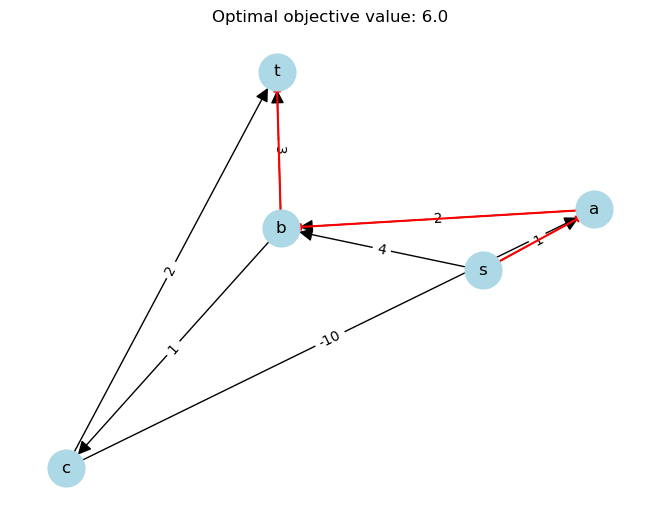

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

# Define the graph
nodes = ['s', 'a', 'b', 'c', 't']
edges = {
    ('s', 'a'): 1,
    ('s', 'b'): 4,
    ('a', 'b'): 2,
    ('c', 'a'): -10,
    ('b', 'c'): 1,
    ('b', 't'): 3,
    ('c', 't'): 2
}

# Create a new model
m = gp.Model()

# Create variables
x = {}
for u, v in edges:
    x[u, v] = m.addVar(vtype=GRB.BINARY, name=f"x_{u}_{v}")

# Set objective function
m.setObjective(gp.quicksum(x[u, v] * edges[u, v] for u, v in edges), GRB.MINIMIZE)

# Add constraints

# Constraint 1: The number of edges leaving 's' is 1
m.addConstr(gp.quicksum(x['s', v] for v in nodes if ('s', v) in edges) == 1, "c1")

# Constraint 2: The number of edges entering 't' is 1
m.addConstr(gp.quicksum(x[u, 't'] for u in nodes if (u, 't') in edges) == 1, "c2")

# Constraint 3: For all other vertices, the number of edges leaving them equals the number of edges entering them
for p in nodes:
    if p not in ['s', 't']:
        m.addConstr(
            gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) -
            gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) == 0,
            f"flow_{p}"
        )
        ##############################################################################
        # Extra Constraints which will take care of negative cycles
        m.addConstr(gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) <= 1, "c3")
        m.addConstr(gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) <= 1, "c4")
        ##############################################################################


# Solve the model
m.optimize()

# Plot the graph and the path taken
G = nx.DiGraph()
G.add_weighted_edges_from((u, v, edges[u, v]) for u, v in edges)

pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", arrowsize=20)
edge_labels = {(u, v): edges[u, v] for u, v in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight the path taken
if m.status == GRB.OPTIMAL:
    path_edges = [(u, v) for u, v in edges if x[u, v].X > 0.5]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=1.5)
    plt.title(f"Optimal objective value: {m.objVal}")
    plt.show()
else:
    print("No optimal solution found.")


### --------------------------------------------------------------------------------------------------------------------------------

### Example 2

Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-19
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 3 3250U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 17 rows, 11 columns and 40 nonzeros
Model fingerprint: 0xf26147cb
Variable types: 0 continuous, 11 integer (11 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 17 rows and 11 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: -2 3 
No other solutions better than -2

Optimal solution found (tolerance 1.0

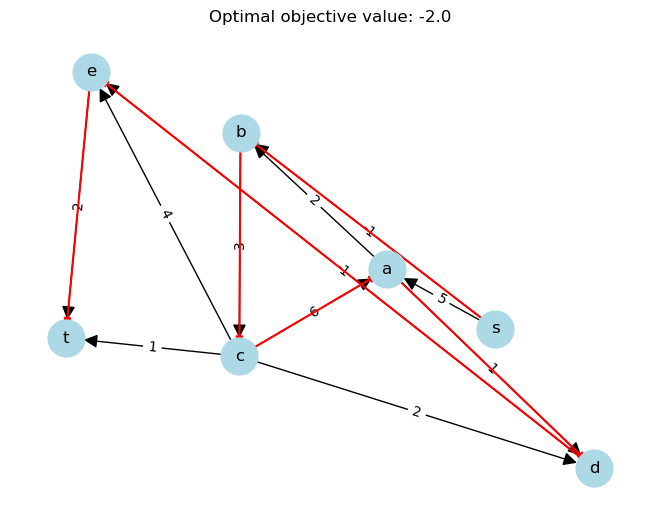

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

# Define the graph
nodes = ['s', 'a', 'b', 'c', 'd', 'e', 't']
edges = {
    ('s', 'a'): 5,
    ('s', 'b'): -1,
    ('a', 'b'): 2,
    ('c', 'a'): -6,
    ('b', 'c'): 3,
    ('a', 'd'): 1,
    ('c', 'd'): 2,
    ('d', 'e'): -1,
    ('c', 'e'): 4,
    ('e', 't'): 2,
    ('c', 't'): 1,
    
}

# Create a new model
m = gp.Model()

# Create variables
x = {}
for u, v in edges:
    x[u, v] = m.addVar(vtype=GRB.BINARY, name=f"x_{u}_{v}")

# Set objective function
m.setObjective(gp.quicksum(x[u, v] * edges[u, v] for u, v in edges), GRB.MINIMIZE)

# Add constraints

# Constraint 1: The number of edges leaving 's' is 1
m.addConstr(gp.quicksum(x['s', v] for v in nodes if ('s', v) in edges) == 1, "c1")

# Constraint 2: The number of edges entering 't' is 1
m.addConstr(gp.quicksum(x[u, 't'] for u in nodes if (u, 't') in edges) == 1, "c2")

# Constraint 3: For all other vertices, the number of edges leaving them equals the number of edges entering them
for p in nodes:
    if p not in ['s', 't']:
        m.addConstr(
            gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) -
            gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) == 0,
            f"flow_{p}"
        )
        ##############################################################################
        # Extra Constraints which will take care of negative cycles
        m.addConstr(gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) <= 1, "c3")
        m.addConstr(gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) <= 1, "c4")
        ##############################################################################


# Solve the model
m.optimize()

# Plot the graph and the path taken
G = nx.DiGraph()
G.add_weighted_edges_from((u, v, edges[u, v]) for u, v in edges)

pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", arrowsize=20)
edge_labels = {(u, v): edges[u, v] for u, v in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight the path taken
if m.status == GRB.OPTIMAL:
    path_edges = [(u, v) for u, v in edges if x[u, v].X > 0.5]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=1.5)
    plt.title(f"Optimal objective value: {m.objVal}")
    plt.show()
else:
    print("No optimal solution found.")

### --------------------------------------------------------------------------------------------------------------------------------------

### Add capability for user to specify the graph structure

Enter the nodes separated by commas:  s


Enter the edges with weights (format: u,v,weight). Type 'done' when finished.


 done


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD Ryzen 3 3250U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 0 columns and 0 nonzeros
Model fingerprint: 0xba6e30c1
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Infeasible model
No optimal solution found.


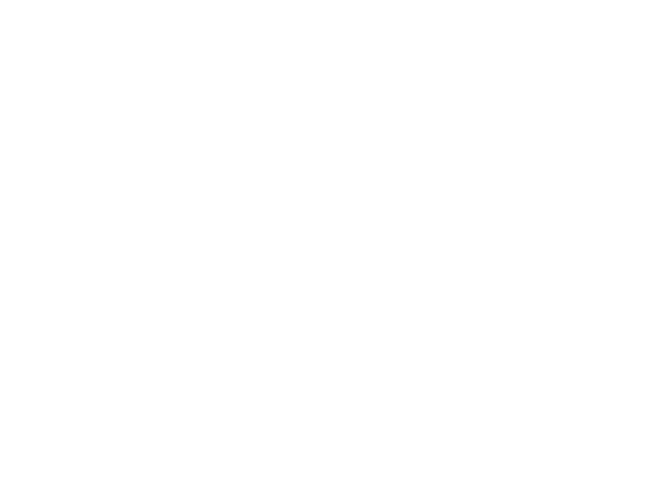

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

def create_graph():
    nodes = input("Enter the nodes separated by commas: ").strip().split(',')
    edges = {}
    print("Enter the edges with weights (format: u,v,weight). Type 'done' when finished.")
    while True:
        edge_input = input().strip()
        if edge_input.lower() == 'done':
            break
        u, v, weight = edge_input.split(',')
        edges[(u, v)] = float(weight)
    return nodes, edges

# Get graph from user input
nodes, edges = create_graph()

# Create a new model
m = gp.Model()

# Create variables
x = {}
for u, v in edges:
    x[u, v] = m.addVar(vtype=GRB.BINARY, name=f"x_{u}_{v}")

# Set objective function
m.setObjective(gp.quicksum(x[u, v] * edges[u, v] for u, v in edges), GRB.MINIMIZE)

# Add constraints

# Constraint 1: The number of edges leaving 's' is 1
m.addConstr(gp.quicksum(x['s', v] for v in nodes if ('s', v) in edges) == 1, "c1")

# Constraint 2: The number of edges entering 't' is 1
m.addConstr(gp.quicksum(x[u, 't'] for u in nodes if (u, 't') in edges) == 1, "c2")

# Constraint 3: For all other vertices, the number of edges leaving them equals the number of edges entering them
for p in nodes:
    if p not in ['s', 't']:
        m.addConstr(
            gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) -
            gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) == 0,
            f"flow_{p}"
        )
        ##############################################################################
        # Extra Constraints which will take care of negative cycles
        m.addConstr(gp.quicksum(x[p, q] for q in nodes if (p, q) in edges) <= 1, "c3")
        m.addConstr(gp.quicksum(x[r, p] for r in nodes if (r, p) in edges) <= 1, "c4")
        ##############################################################################

# Solve the model
m.optimize()

# Plot the graph and the path taken
G = nx.DiGraph()
G.add_weighted_edges_from((u, v, edges[u, v]) for u, v in edges)

pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", arrowsize=20)
edge_labels = {(u, v): edges[u, v] for u, v in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight the path taken
if m.status == GRB.OPTIMAL:
    path_edges = [(u, v) for u, v in edges if x[u, v].X > 0.5]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2.5)
    plt.title(f"Optimal objective value: {m.objVal}")
    plt.show()
else:
    print("No optimal solution found.")
